# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Trabajo Práctico 1 : Propiedades en Venta</center>
### <center> Grupo 22 </center>
### <center> Integrantes: </center>
##### <center> Federico Martin Forte,  Francisco Sobral,  Ian Klaus von der Heyde,  Juan Pablo Aschieri,  Joaquin Rivero  </center>

## Carga de Datos y librerías

In [105]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('always')
from sklearn.model_selection import train_test_split


In [106]:
dataset=pd.read_csv('./Datasets/properati_argentina_2021.csv').copy()

## Análisis Exploratorio y Preprocesamiento de Datos

#### Exploración Inicial :

##### Primer análisis y seleccionamento de datos

In [107]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460154 entries, 0 to 460153
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        460154 non-null  object 
 1   start_date                460154 non-null  object 
 2   end_date                  460154 non-null  object 
 3   created_on                460154 non-null  object 
 4   latitud                   419740 non-null  float64
 5   longitud                  419740 non-null  float64
 6   place_l2                  460154 non-null  object 
 7   place_l3                  437665 non-null  object 
 8   place_l4                  139020 non-null  object 
 9   place_l5                  2430 non-null    object 
 10  place_l6                  0 non-null       float64
 11  operation                 460154 non-null  object 
 12  property_type             460154 non-null  object 
 13  property_rooms            368498 non-null  f

nos quedamos unicamente con las viviendas en venta ubicadas en CABA cuyo precio esta en dólares.

In [108]:
viviendas = dataset[dataset.property_type.isin(['Casa', 'PH', 'Departamento'])].copy()  #deberiamos dejar la casa de campo?
viviendas_caba= viviendas[(viviendas.place_l2 == 'Capital Federal') & (viviendas.operation == 'Venta') & (viviendas.property_currency == 'USD')].copy()

volvemos a analizar el nuevo dataset

In [109]:
viviendas_caba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94249 entries, 25 to 460090
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        94249 non-null  object 
 1   start_date                94249 non-null  object 
 2   end_date                  94249 non-null  object 
 3   created_on                94249 non-null  object 
 4   latitud                   90519 non-null  float64
 5   longitud                  90519 non-null  float64
 6   place_l2                  94249 non-null  object 
 7   place_l3                  93832 non-null  object 
 8   place_l4                  3643 non-null   object 
 9   place_l5                  0 non-null      object 
 10  place_l6                  0 non-null      float64
 11  operation                 94249 non-null  object 
 12  property_type             94249 non-null  object 
 13  property_rooms            93205 non-null  float64
 14  prop

eliminamos columnas que no nos sirven y columnas vacias

In [110]:
viviendas_caba.drop(columns=['start_date' , 'end_date', 'created_on', 'place_l2', 'operation', 'property_currency', 'place_l5', 'place_l6', 'id'], inplace=True) #SACAMOS TODO A LA MIERDA incluyendo place_l5 por no tenber datos

Renombramos algunas columnas para representar mejor los datos

In [111]:
columnas={"place_l3":"barrio", 'place_l4':'vecindad'}

viviendas_caba.rename(columns = columnas, inplace = True)


dividimos el dataset en entrenamiento y prueba.
En este caso vamos a entrenar utilizando el 80% de los datos y validando los modelos sobre el 20% de datos restantes.

In [112]:
viviendas_caba_train, viviendas_caba_test = train_test_split(viviendas_caba, test_size=0.2, random_state=2)
viviendas_caba_train.head()


,latitud,longitud,barrio,vecindad,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
256070,-34.566536,-58.479638,Coghlan,NaN,Departamento,2.0,1.0,65.0,53.0,198000.0,1 - Holmberg 2700
27438,-34.645625,-58.459408,Flores,NaN,Departamento,1.0,NaN,29.0,29.0,63000.0,Departamento a estrenar - Edificio con ameniti...
211207,NaN,NaN,Caballito,NaN,Departamento,2.0,1.0,41.0,35.0,93000.0,Departamento de 2 ambientes con balcón aterraz...
228948,-34.577033,-58.423367,Palermo,NaN,Departamento,1.0,1.0,49.0,44.0,160000.0,Departamento - Monoambiente - Palermo Nuevo - ...
361800,-34.580210,-58.412815,Palermo,NaN,Departamento,1.0,2.0,NaN,78.0,290000.0,Departamento en Palermo


##### Análisis medidas de resumen de variables cuantitativas:

In [113]:
medidas_de_resumen = viviendas_caba_train.describe()
medidas_de_resumen.drop(['count' , 'std', 'min', 'max'], axis=0, inplace=True)
moda = viviendas_caba_train.mode()
moda.head(10)
moda.index = ['mode']

moda.drop(['barrio', 'vecindad','property_type','property_title'], axis = 1, inplace = True) 

medidas_de_resumen = pd.concat([medidas_de_resumen, moda])
medidas_de_resumen

,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
mean,-34.591125,-58.450693,2.822798,2.015567,112.53916,90.110213,227331.542381
25%,-34.615979,-58.466523,2.000000,1.000000,45.00000,40.000000,95000.000000
50%,-34.595749,-58.439042,3.000000,2.000000,65.00000,57.000000,144000.000000
75%,-34.577395,-58.408935,4.000000,3.000000,105.00000,89.000000,235000.000000
mode,-34.541250,-58.472966,3.000000,1.000000,50.00000,40.000000,110000.000000


##### Análisis graficamente distribucion de variables cuantitativas

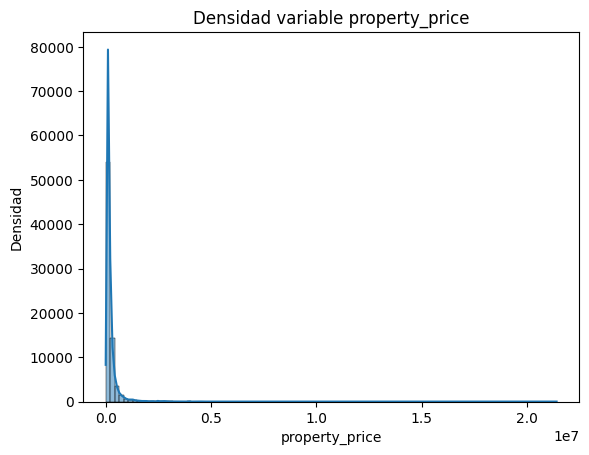

In [114]:
sns_hist=sns.histplot(data=viviendas_caba_train['property_price'], kde=True, alpha = 0.5, bins=100).set(title="Densidad variable property_price",xlabel="property_price",ylabel="Densidad")

podemos ver que hay precios muy elevados que se alejan de lo habitual

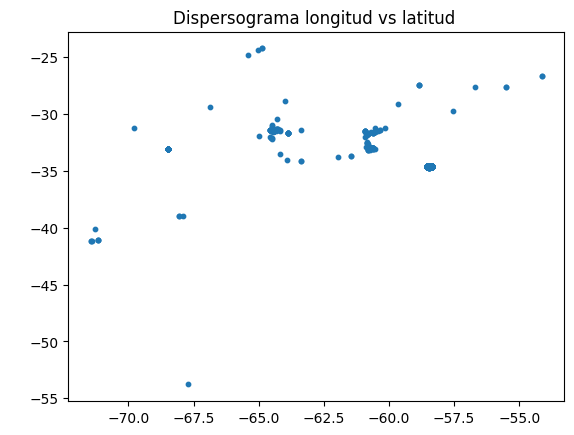

In [115]:
grf_long_lat=viviendas_caba_train.plot.scatter(x="longitud", y="latitud", s=10).set(title="Dispersograma longitud vs latitud ",xlabel='',ylabel=' ')

Aca ya podemos ver que hay puntos que no estan dentro de la lat y long de caba, es decir outliers que tendremos que procesar    

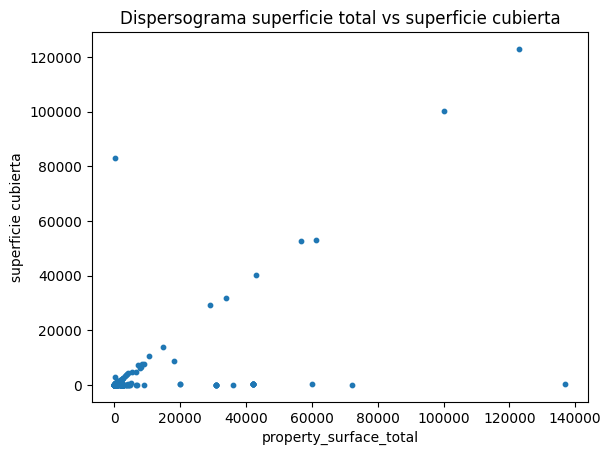

In [116]:
grf_sup=viviendas_caba_train.plot.scatter(x="property_surface_total", y="property_surface_covered", s=10).set(title="Dispersograma superficie total vs superficie cubierta",xlabel='property_surface_total',ylabel='superficie cubierta') 

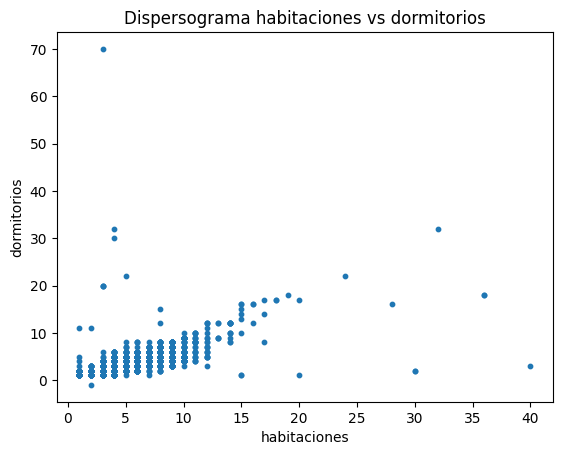

In [117]:
grf_dormitorios_por_habitaciones=viviendas_caba_train.plot.scatter(x="property_rooms", y="property_bedrooms", s=10).set(title="Dispersograma habitaciones vs dormitorios",xlabel='habitaciones',ylabel='dormitorios') 

vemos que hay algunos que todos los que estan por encima de la diagonal tienen mas dormitorios que habitaciones por lo que deben estar mal

##### Análisis cantidad de valores posibles y frecuencias de las variables cualitativas

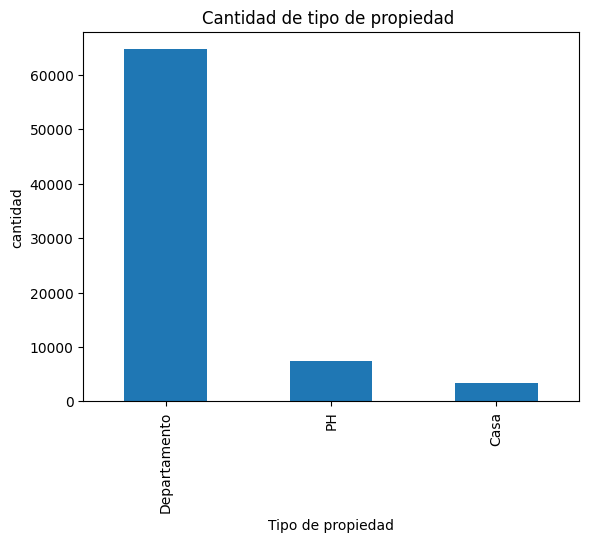

In [118]:
grf = viviendas_caba_train.property_type.value_counts().plot.bar( title="Cantidad de tipo de propiedad " , xlabel="Tipo de propiedad" , ylabel="cantidad")

 

<AxesSubplot:title={'center':'Cantidad de viviendas por barrio'}, xlabel='barrio', ylabel='cantidad'>

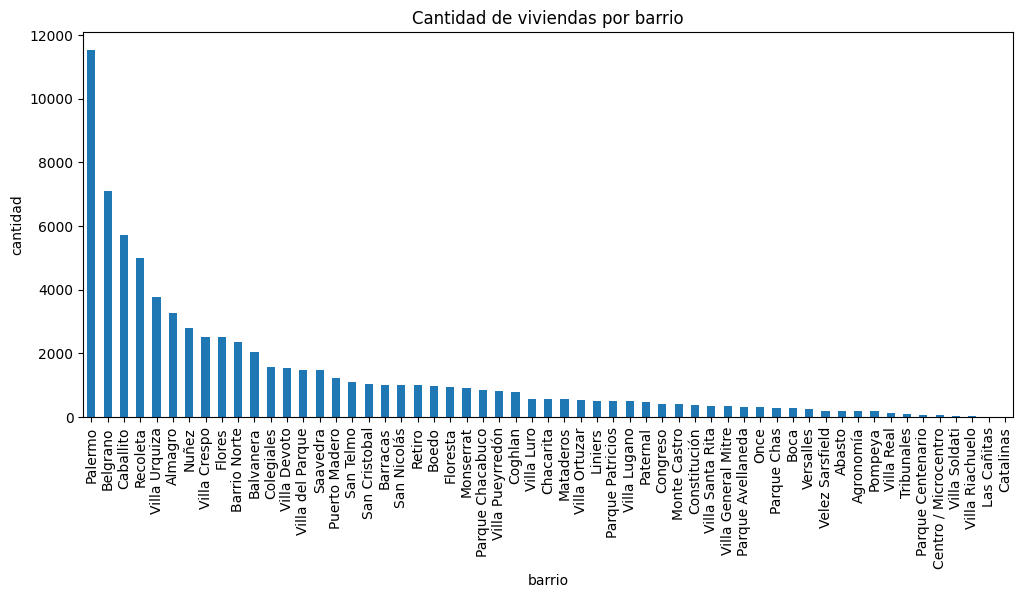

In [119]:
viviendas_caba_train.barrio.value_counts().plot.bar(figsize=(12,5),title="Cantidad de viviendas por barrio" , xlabel="barrio" , ylabel="cantidad")

Hola:)

<AxesSubplot:title={'center':'Cantidad de viviendas por vecindario'}, xlabel='vecindario', ylabel='cantidad'>

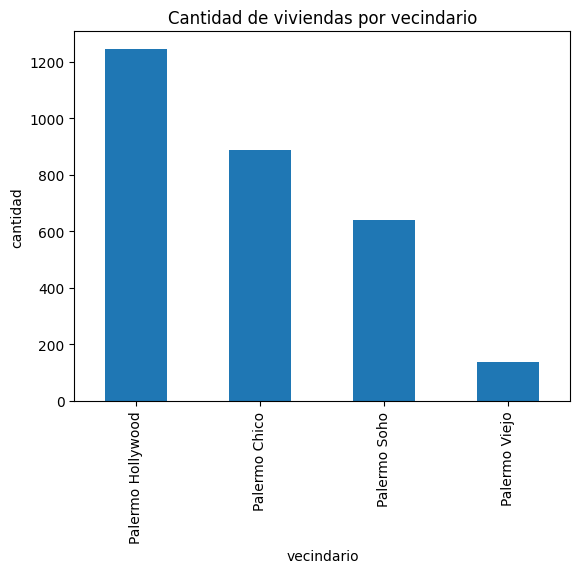

In [120]:
viviendas_caba_train.vecindad.value_counts().plot.bar(title="Cantidad de viviendas por vecindario" , xlabel="vecindario" , ylabel="cantidad")

Como solo palermo tiene vecindarios cargados tenemos que tomar una desicion. O los consideramos a todos como parlermo, o en veez de considerar 58 barrios consieramos 63 barrios y sacamos las vecindades y los metemos en los barrios.

In [121]:
viviendas_caba_train.property_title.value_counts()

Departamento - Palermo                                               1192
Departamento - Recoleta                                              1068
Departamento - Belgrano                                               886
Departamento - Caballito                                              736
Departamento - Almagro                                                539
                                                                     ... 
DEPARTAMENTO VENTA CABALLITO TRES AMBIENTES                             1
VENTA  DPTO 2 AMBIENTES ALMAGRO EDIFICIO C/ PILETA                      1
DEPARTAMENTO EN VENTA VILLA LUGANO                                      1
VENTA 3 AMBIENTES DEPARTAMENTO CABALLITO                                1
BELGRANO - 2 ambientes de 50m2 en edificio full amenities - VENTA       1
Name: property_title, Length: 46446, dtype: int64

##### Análisis relacion entre algunas variables cualitativas con cuantitativas

<AxesSubplot:title={'center':'promedio de precios por barrio'}, xlabel='barrio', ylabel='promedio de precios'>

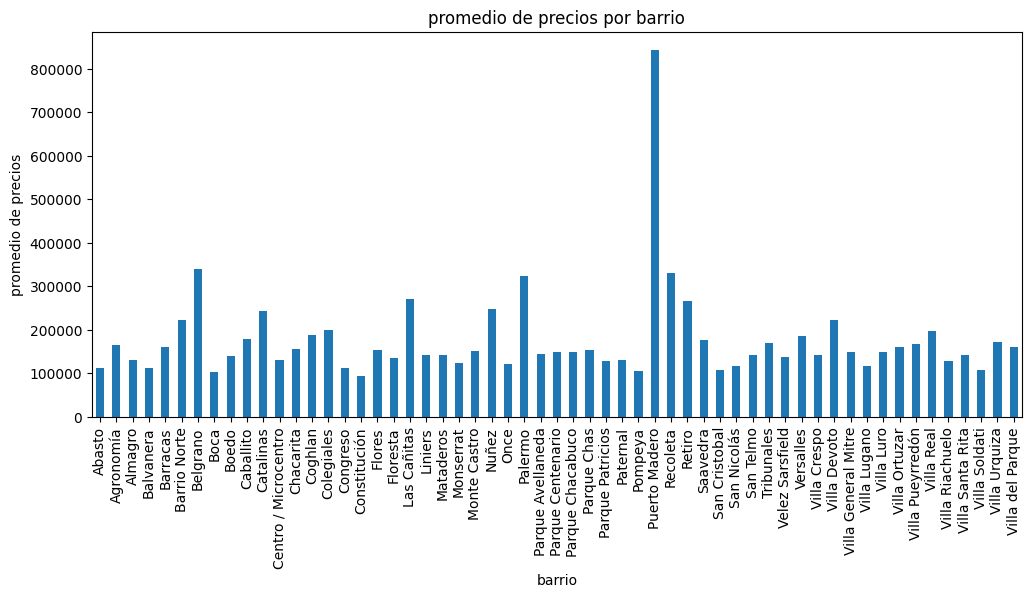

In [122]:
viviendas_caba_train.groupby('barrio')['property_price'].mean().plot.bar(figsize=(12,5), title="promedio de precios por barrio" , xlabel="barrio" , ylabel="promedio de precios")

a simple vista pareciera que hay barrios mas caros que otros

<AxesSubplot:title={'center':'promedio de superficie total por por barrio'}, xlabel='barrio', ylabel='promedio de superfiecie total'>

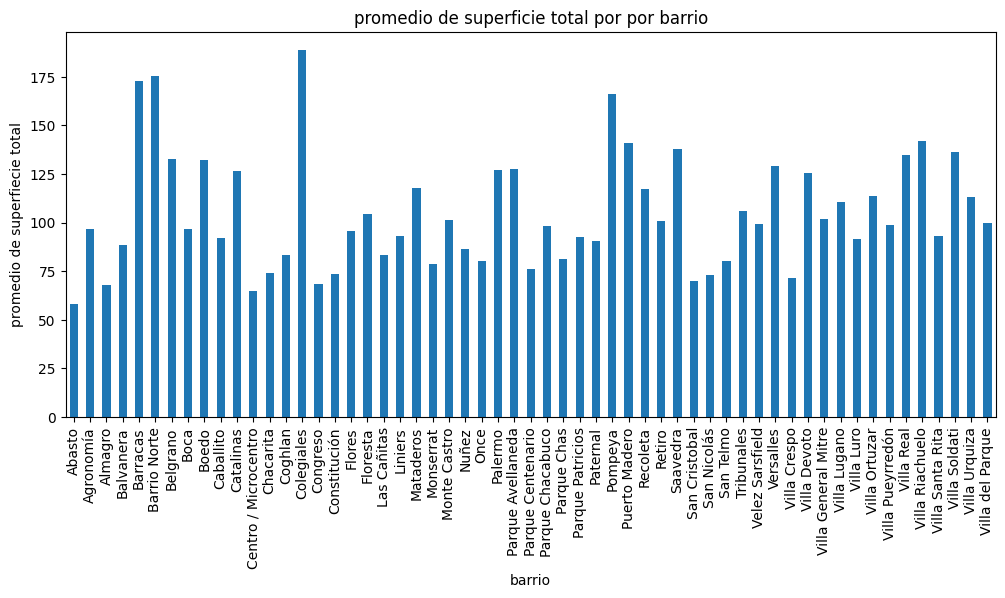

In [123]:
viviendas_caba_train.groupby('barrio')['property_surface_total'].mean().plot.bar(figsize=(12,5), title="promedio de superficie total por por barrio" , xlabel="barrio" , ylabel="promedio de superfiecie total")

vemos que en cuanto tama;o hjay una distribucion bastante pareja

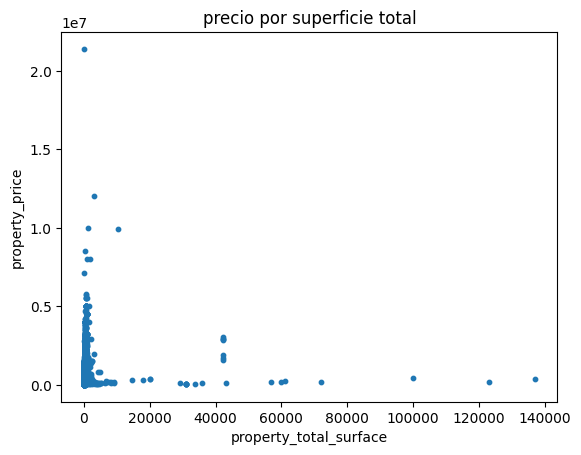

In [124]:
grf_precio_por_superficie=viviendas_caba_train.plot.scatter(x="property_surface_total", y="property_price", s=10).set(title="precio por superficie total",xlabel='property_total_surface',ylabel='property_price') 

Outliers no dejan sacar mucha info del grafico.

##### Correlación entre variables

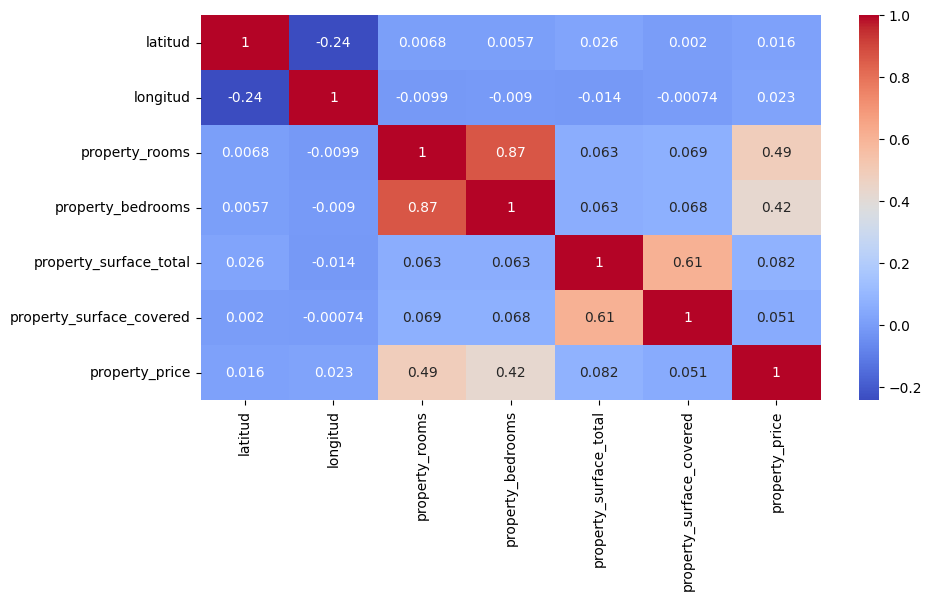

In [125]:
matriz_correlacion=viviendas_caba_train.corr()

plt.figure(figsize=(10,5))
sns.heatmap(matriz_correlacion, annot = True,cmap = 'coolwarm')
plt.show()

Despues de realiza el grafico de correlaciones, vemos que ademas de las relaciones obias, como cantidad de cuartos con cantidad de habitaciones y la superficie total con la superficie cubierta. Ademas podemos notar una leve correlacion entre el precio y la cantidad de habitaciones

##### Conlusiones generales del análisis Exploratorio

Vendemos mayormente deptos, hay datos erroneos que estan por fuera de la lat y long de caba. 
Se suele vender propiedades con pocas habitaciones y a su vez que hay propiedades con mas dormitorios que habitaciones lo cual carece de sentido. 
Los barrios con mas propiedades en venta son Palermo, Belgrano y Caballito. En catalania se vende poco zona de oficina.
Hay propiedades con mucha mas superficie cubierta que total, es decir edificios.
Todos los graficos y conclusiones vistas hasta ahora, se ven afectadas por datos faltantes, redudantes y outliers.

#### Datos Faltantes :

##### Datos faltantes a nivel columna:

Al principio de la notebook ya eliminamos dos columnas, l_5 y l_6, ya no contaban con ningun dato. Ahora examinaremos el resto de las columnas

<AxesSubplot:title={'center':'porcentaje de datos faltantes por categoria'}, xlabel='categoria', ylabel='porcentaje'>

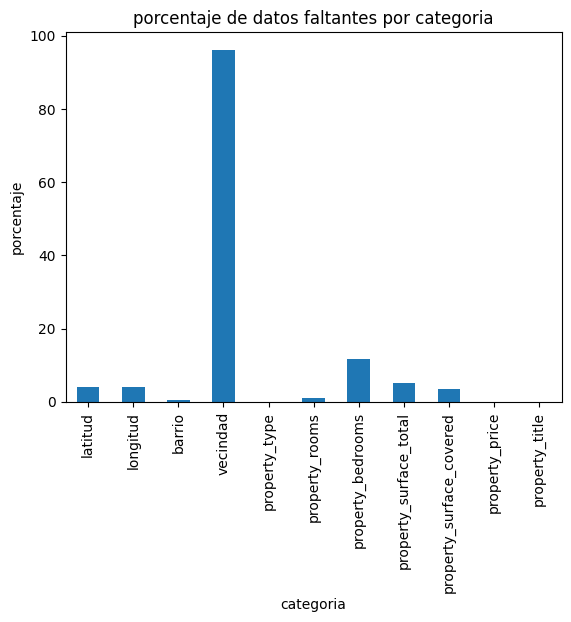

In [126]:
((viviendas_caba_train.isna().sum())/viviendas_caba_train.shape[0]*100).plot.bar(xlabel = 'categoria', ylabel = 'porcentaje', title = 'porcentaje de datos faltantes por categoria')


##### Datos faltantes a nivel fila:

<AxesSubplot:title={'center':'porcentaje de datos faltantes por fila'}, xlabel='cantidad de datos faltantes', ylabel='porcentaje'>

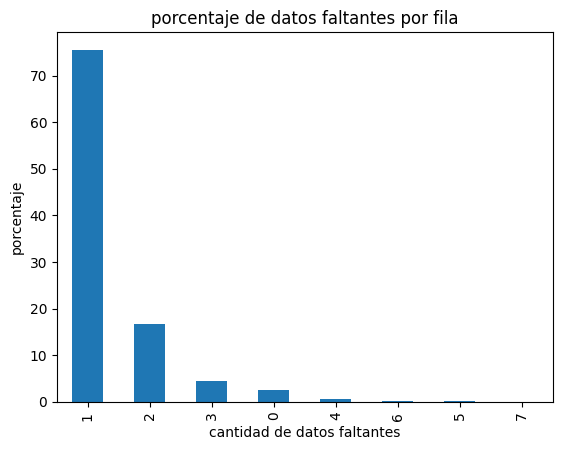

In [127]:
((viviendas_caba_train.isnull().sum(axis=1).value_counts())/viviendas_caba_train.shape[0]*100).plot.bar(xlabel = 'cantidad de datos faltantes', ylabel = 'porcentaje', title = 'porcentaje de datos faltantes por fila')

vemos que tenemos un gran porcentaje de filas que tienen un solo dato faltante

##### Reparación de datos:

Lo primero que vemos que mas llama la atencion es la vecindad que tiene mas del 96% de datos faltantes. Como habiamos visto mas arriba los unicos datos que tiene esta columna provienen de parlermo. Para tratar estos datos faltantes notamos 3 opciones. Eliminar la columna enteramente, imputar los datos correspondientes a palermo eliminar la columna pero en vez de tener en la columna barrio a Palermo, tener las 4 vecinadades. O si no tener 5 barrios que representen a parlemo, uno generico y las 4 vecindades. Decidimos eliminar de lleno a la columa ya que era muy grande el porcentaje de datos faltantes.

In [128]:
viviendas_caba_train.drop(columns=['vecindad'], inplace=True)

Luego de eliminar la vecindad volvemos  agraficar para ver el estado actual de los datos faltantes 

<AxesSubplot:title={'center':'porcentaje de datos faltantes por fila'}, xlabel='cantidad de datos faltantes', ylabel='porcentaje'>

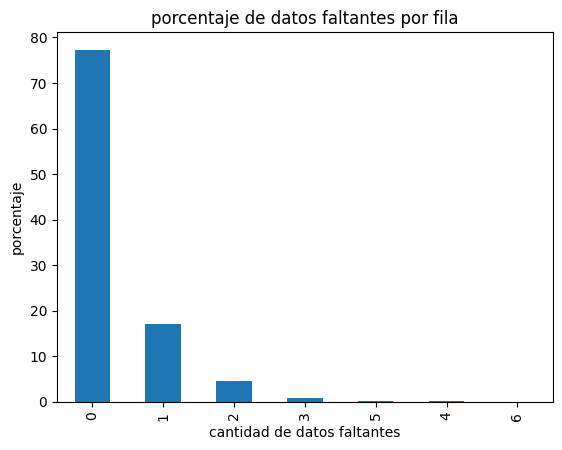

In [129]:
((viviendas_caba_train.isnull().sum(axis=1).value_counts())/viviendas_caba_train.shape[0]*100).plot.bar(xlabel = 'cantidad de datos faltantes', ylabel = 'porcentaje', title = 'porcentaje de datos faltantes por fila')

vemos que casi un 80% de nuestras filas no tienen datos faltantes

<AxesSubplot:title={'center':'porcentaje de datos faltantes por categoria'}, xlabel='categoria', ylabel='porcentage'>

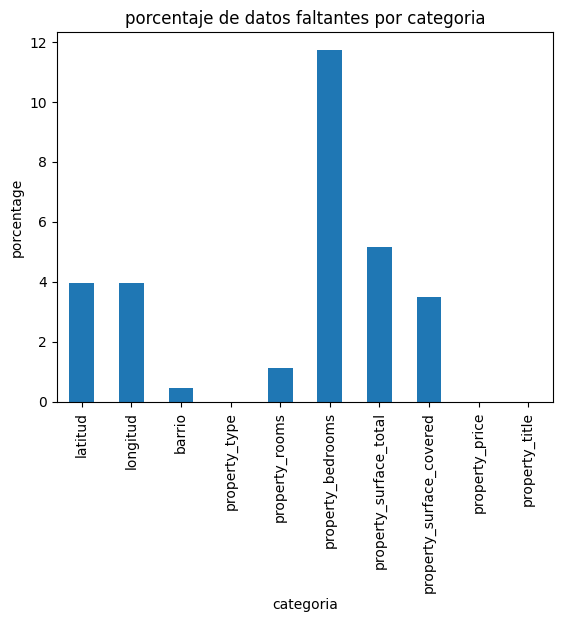

In [130]:
((viviendas_caba_train.isna().sum())/viviendas_caba_train.shape[0]*100).plot.bar(xlabel = 'categoria', ylabel = 'porcentage', title = 'porcentaje de datos faltantes por categoria')

In [131]:
viviendas_caba_train[viviendas_caba_train.barrio.isna()].longitud.notna().sum() #VER QUE ONDA LA JUSTIFICACION DE ABAJO

207

Reparacion de barrios utilizando latitud y longitud: 

Hay algunas propiedades que tienen latitud y longitud pero no tiene el barrio cargado. Para llenar estos podriamos descargarnos un dataset de la ciudad que nos dice las coordenados de cada barrio. Esto si bien completa los datos faltantes, es mucho quilombo para nada mas completar 207 filas. Pero como solo son 207 elementos los que tienen coordenadas y no barrio los dejamos (por ahora)


Podemos inputar datos sobre cantidad de dormitorios en base a la cantidad de habitaciones utilizando regresion lineal

In [132]:
from sklearn.linear_model import LinearRegression
#Creo un regresor lineal
modelo_regresion_lineal_simple = LinearRegression()

#Doy el formato adecuado a las variables dependiente e independiente

aux = viviendas_caba_train[viviendas_caba_train.property_rooms.notna() & viviendas_caba_train.property_bedrooms.notna()]

x=aux.property_rooms.values
y=aux.property_bedrooms.values

x_=x.reshape(-1, 1)
y_=y.reshape(-1, 1)

#Ajusto el modelo
modelo_regresion_lineal_simple.fit(x_,y_)

#Parámetros estimados
B1_e=round(modelo_regresion_lineal_simple.coef_[0][0],2) #coef = pendiente
B0_e=round(modelo_regresion_lineal_simple.intercept_[0],2) #intercept = ordenada al origen

#Muestro el modelo
print(f" El modelo lineal simple ajustado es : y = {B1_e} * X  + {B0_e}")

 El modelo lineal simple ajustado es : y = 0.72 * X  + -0.17


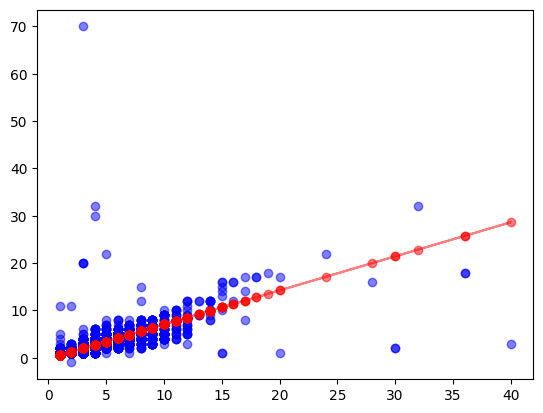

In [133]:
#Calculo los valores que estima mi modelo lineal simple

y_e=B1_e *x_ + B0_e

#Grafico las observaciones reales + las estimadas
plt.scatter(x,y,label='data', color='blue',alpha=0.5)
plt.plot(x_,y_e,label='data', color='red',alpha=0.5)
plt.scatter(x_,y_e,label='data', color='red',alpha=0.5)

In [134]:
sin_bedroom_con_room = viviendas_caba_train[viviendas_caba_train.property_rooms.notna() & viviendas_caba_train.property_bedrooms.isna()]
sin_bedroom_con_room.head()

,latitud,longitud,barrio,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
27438,-34.645625,-58.459408,Flores,Departamento,1.0,NaN,29.0,29.0,63000.0,Departamento a estrenar - Edificio con ameniti...
155007,NaN,NaN,Villa Crespo,Departamento,1.0,NaN,47.0,32.0,66780.0,VENTA - Departamento en pozo- Villa Crespo
163967,-34.579829,-58.433008,Palermo,Departamento,1.0,NaN,41.0,30.0,99500.0,Departamento Venta - Palermo Hollywood
310141,-34.570436,-58.434466,Palermo,Departamento,1.0,NaN,42.0,37.0,150000.0,Departamento 1 Amb. c/Cochera - Las Cañitas
137226,-34.582098,-58.448859,Palermo,Departamento,1.0,NaN,33.0,28.0,104892.0,Venta - Newbery Jorge 3445 9º F Jardin


Con esto obtuvimos un modelo lineal para predecir la cantidad de dormitorios en funcion de la cantidad de cuartos, de la forma cantidadDeBedrooms = 0.72 * cantidadDeRooms - 0.17

In [135]:

sin_bedroom_con_room.property_bedrooms = ((sin_bedroom_con_room.property_rooms*0.72) -0.17).round()
#FALTA TRANSLADAR ESTO AL ORIGINAL
#Determinar, de ser posible, estrategias para reparar los valores faltantes.



C:\Users\iankl\AppData\Local\Temp\ipykernel_15408\2143658826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_bedroom_con_room.property_bedrooms = ((sin_bedroom_con_room.property_rooms*0.72) -0.17).round()


Con lo anterior concluimos que una buena forma de complertar la cantidad de dormitorios es usando regresion lineal a partir de la cantidad de habitaciones

para ver si podemos completar los datos que nos faltan de property_surface_covered, lo que hacemos es fijarnos si hay alguna relacion entre la cantidad de cuartos y la superficie cubierta, dado un tipo de propiedad, ya sea casa, departamento o PH. 

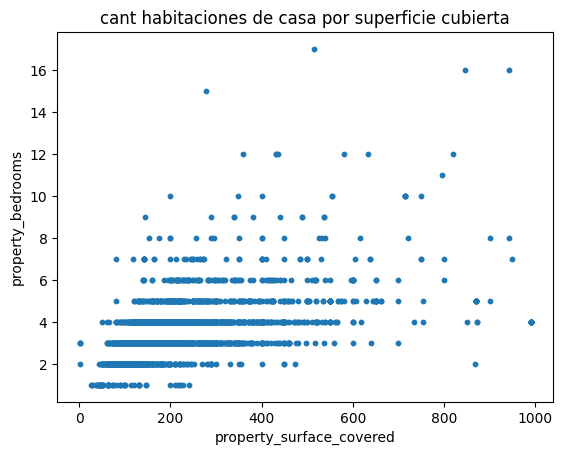

In [136]:
cant_hab_casa = viviendas_caba_train[viviendas_caba_train.property_surface_covered < 1000]
grf_bedrooms_cover_surface_casa = cant_hab_casa[cant_hab_casa.property_type=='Casa'].plot.scatter(x="property_surface_covered", y="property_bedrooms", s=10).set(title="cant habitaciones de casa por superficie cubierta",xlabel='property_surface_covered',ylabel='property_bedrooms') 


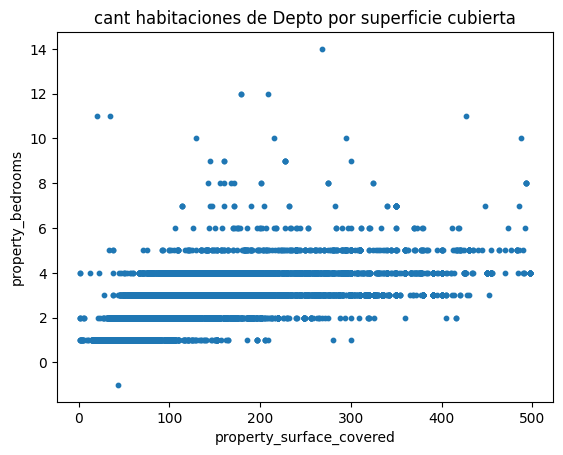

In [137]:
cant_hab_depto = viviendas_caba_train[(viviendas_caba_train.property_surface_covered < 500) & (viviendas_caba_train.property_bedrooms < 15)]

grf_bedrooms_cover_surface_depto  = cant_hab_depto[cant_hab_depto.property_type=='Departamento'].plot.scatter(x="property_surface_covered", y="property_bedrooms", s=10).set(title="cant habitaciones de Depto por superficie cubierta",xlabel='property_surface_covered',ylabel='property_bedrooms') 


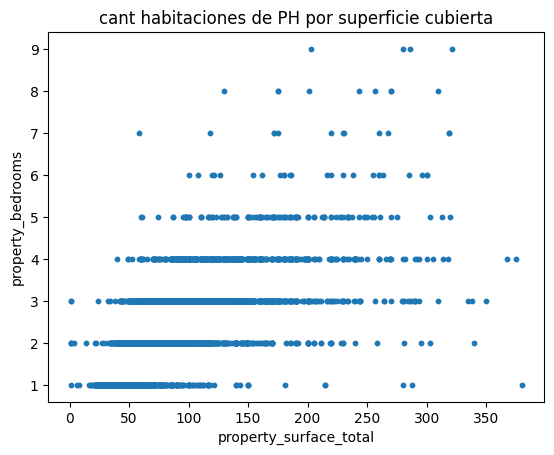

In [138]:
cant_hab_ph = viviendas_caba_train[(viviendas_caba_train.property_surface_covered < 400) & (viviendas_caba_train.property_bedrooms < 10)]
grf_bedrooms_cover_surface_ph = cant_hab_ph[cant_hab_ph.property_type=='PH'].plot.scatter(x="property_surface_covered", y="property_bedrooms", s=10).set(title="cant habitaciones de PH por superficie cubierta",xlabel='property_surface_total',ylabel='property_bedrooms') 


Despues de analizar los 3 graficos, no encontramos ninguna relacion lo suficientemente fuerte como para completar las superficies cubiertas con la cantidad de cuartos

#### Valores atípicos 

##### Análisis univariadoComienzo el analisis de valores atípicos graficando atributos de forma univariada.

[Text(0.5, 1.0, 'Box plot latitud y longitud')]

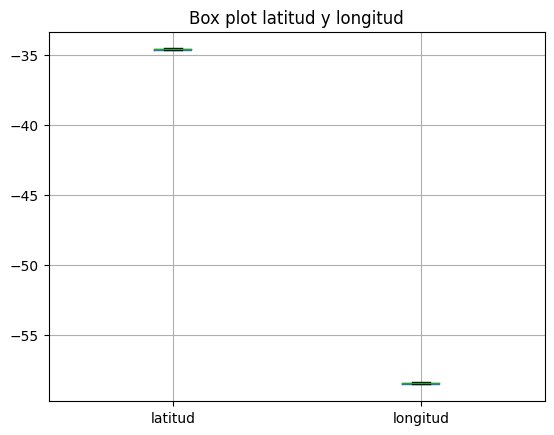

In [157]:
columnas = viviendas_caba_train.columns.copy()
boxplot_lat_long = viviendas_caba_train.boxplot(column = ['latitud','longitud']).set(title ='Box plot latitud y longitud')
boxplot_lat_long

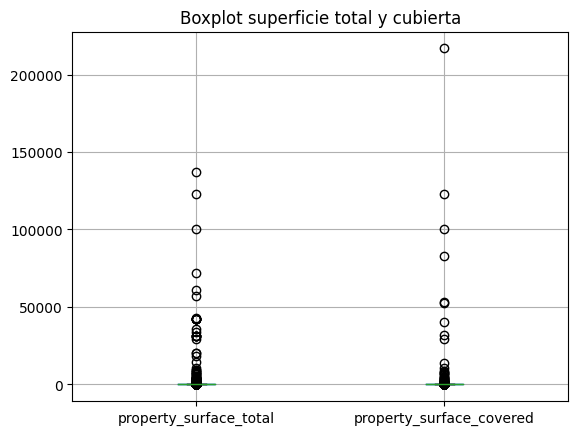

In [158]:
boxplot_surface = viviendas_caba_train.boxplot(column = ['property_surface_total','property_surface_covered']).set(title = 'Boxplot superficie total y cubierta')

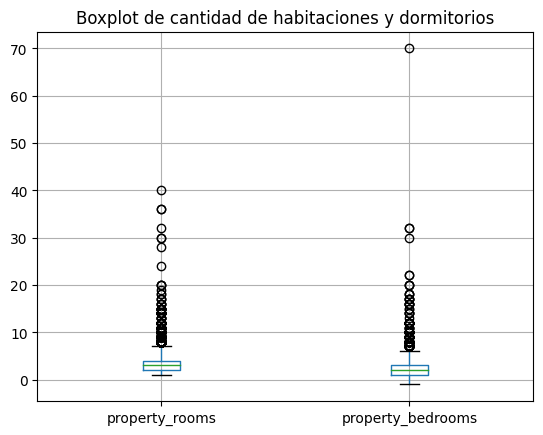

In [160]:

boxplot_surface = viviendas_caba_train.boxplot(column = ['property_rooms','property_bedrooms']).set(title= 'Boxplot de cantidad de habitaciones y dormitorios')

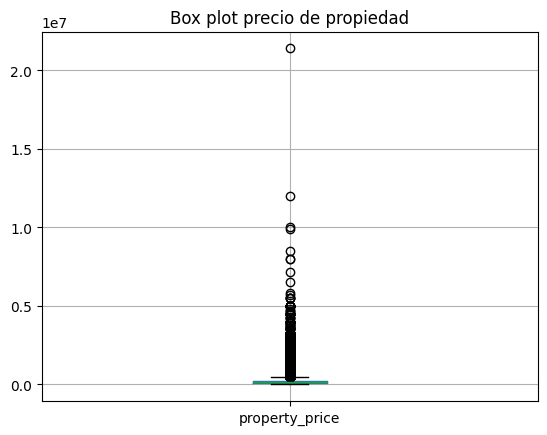

In [159]:
boxplot_price = viviendas_caba_train.boxplot(column = ['property_price']).set(title = 'Box plot precio de propiedad')

De aqui se concluye:

+ Hay varios oustiders en todas las variables.
+ Dentro de latitud y longitud, se ve que hay valores demasiado amplios como para pertenecer a CABA
+ Hay valores de superficie demasiado grandes como para pertenecer a un PH, casa, o departamento
+ Los outsiders en cantidades de ambientes podrian pertenecer a casas muy grandes, deberian ser muy pocas en CABA.
+ La variedad de precios es demasiado grande, inferimos que hubieron casos de errores en la carga de los datos. 

decidimos tratar los outliers mas extremos por ejemplo eliminando aquellos cuya latitud o longitud esten muy por fuera de la de CABA

In [146]:
#Verificar lat y long min/max (lo hicimos a ojo)
#Ver que hacer en caso de que tenga barrio OK y lat o long mal
lat_min = -34.661154  
lat_max = -34.523859

long_min = -58.538441   
long_max = -58.306373
print(viviendas_caba_train.shape)

filas_a_dropear_por_long = viviendas_caba_train[(viviendas_caba_train.longitud < long_min) | (viviendas_caba_train.longitud > long_max)]
viviendas_caba_train.drop(filas_a_dropear_por_long.index, axis=0, inplace=True)
print(viviendas_caba_train.shape)

filas_a_dropear_por_lat = viviendas_caba_train[(viviendas_caba_train.latitud < lat_min) | (viviendas_caba_train.latitud > lat_max)]
viviendas_caba_train.drop(filas_a_dropear_por_lat.index, axis=0, inplace=True)

(75399, 10)
(75233, 10)


volvemos a graficar el boxplot para ver la mejoría

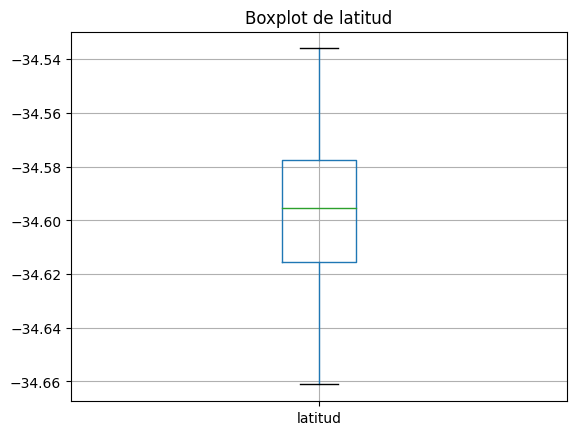

In [161]:
columnas = viviendas_caba_train.columns.copy()
boxplot_lat = viviendas_caba_train.boxplot('latitud').set(title = 'Boxplot de latitud')

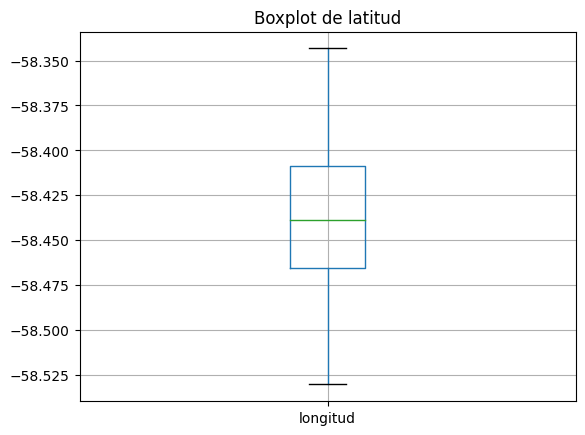

In [162]:
columnas = viviendas_caba_train.columns.copy()
boxplot_long = viviendas_caba_train.boxplot('longitud').set(title = 'Boxplot de latitud' )

##### Análisis multivariado

estan los graficos de arriba. ver si los ponemos de vuelta o los cambiamos de lugar

Tratamiento a aplicar:      //decidir para cada caso
+ lat/long -> a casa
+ superficie -> podriamos recortar
+ cuartos -> recortar


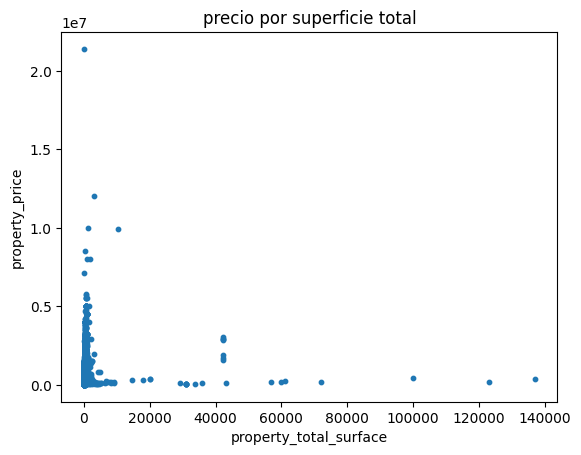

In [143]:
grf_price_surface=viviendas_caba_train.plot.scatter(x="property_surface_total", y="property_price", s=10).set(title="precio por superficie total",xlabel='property_total_surface',ylabel='property_price') 

De este grafico vemos dos cosas:
+ No se ve una correlacion a simple vista de precio-superficie total. Suponemos que se debe a que influye mas la zona que la superficie total en el precio de las propiedades.
+ Hay varios outliers previamente no detectados: 
    + Propiedades con precios extremadamente bajos y superficies enormes.
    + Propiedades con precios muy altos y superficies pequeñas.

Tambien sabemos que la mayor cantidad de propiedades se encuentran en la zona inferior izquierda del grafico. Una representacion mas precisa de esa zona podria evidenciar una relacion mas clara de los atributos. 

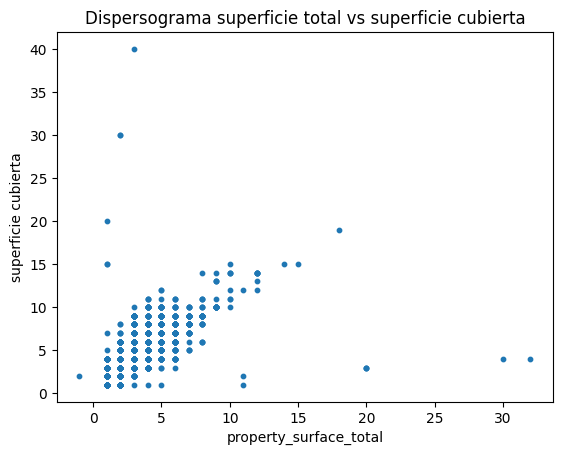

In [144]:
aux = viviendas_caba_train[viviendas_caba_train.property_surface_total < 500]
grf_sup=aux.plot.scatter(x="property_bedrooms", y="property_rooms", s=10).set(title="Dispersograma superficie total vs superficie cubierta",xlabel='property_surface_total',ylabel='superficie cubierta') 